### 미니배치 버전 파이썬 구현 

In [2]:
import numpy as np
X = np.random.rand(10,2)
X # 인스턴스 2개, 컬럼 2 개

array([[0.93256658, 0.7292187 ],
       [0.81413981, 0.11899384],
       [0.98311795, 0.50609766],
       [0.38656816, 0.20989964],
       [0.09565975, 0.92691091],
       [0.31177121, 0.79998728],
       [0.28789427, 0.39226087],
       [0.69164638, 0.89323183],
       [0.06993478, 0.42914348],
       [0.82771426, 0.59064312]])

In [3]:
w1 = np.random.rand(2,4)
w1

array([[0.65666646, 0.2090518 , 0.93970752, 0.75016976],
       [0.90454261, 0.63630192, 0.42948618, 0.79640112]])

In [5]:
b1 = np.random.rand(4)
b1

array([0.72820568, 0.23623519, 0.66006002, 0.91489649])

In [8]:
H = np.matmul(X,w1) + b1
H

array([[2.00020026, 0.89519318, 1.84958921, 2.19523034],
       [1.37045898, 0.48214859, 1.47621954, 1.62040639],
       [1.83157316, 0.76378868, 1.80126531, 2.0554586 ],
       [1.17191519, 0.4506075 , 1.11347002, 1.37205255],
       [1.62945263, 0.84602823, 1.14804763, 1.72485043],
       [1.65655795, 0.81044497, 1.29661725, 1.78588859],
       [1.27207285, 0.54601635, 1.09906705, 1.44326307],
       [1.99035291, 0.94919025, 1.69363606, 2.14511953],
       [1.16230806, 0.52392001, 0.91008946, 1.3091298 ],
       [1.80599974, 0.7850977 , 1.6915424 , 2.00621155]])

## 시그모이드 함수

In [9]:
def sigmoid(x):
    return 1/ (1+np.exp(-x))

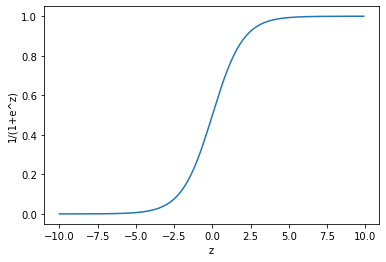

In [15]:
import matplotlib.pyplot as plt
zs = np.arange(-10,10,0.1) # x 값의 범위 -10부터 0.1 간격
gs = [sigmoid(z) for z in zs]
plt.plot(zs,gs)
plt.xlabel('z') # z = -(x*w + b)
plt.ylabel('1/(1+e^z)')
plt.show()

In [18]:
# 1 layer logistic Regression(Binary classification)
X = np.random.rand(10,2)
W1 = np.random.rand(2,4)
b1 = np.random.rand(4)
a = np.matmul(X,W1) + b1
h = sigmoid(a) 
h

array([[0.69637496, 0.56688403, 0.84538043, 0.68886578],
       [0.70520947, 0.55187278, 0.81114722, 0.67669885],
       [0.69338473, 0.54376247, 0.75155631, 0.63193213],
       [0.69583418, 0.55396855, 0.79937489, 0.66011628],
       [0.69913668, 0.54220669, 0.75879471, 0.64184882],
       [0.69565641, 0.53863262, 0.73400458, 0.6257035 ],
       [0.7082323 , 0.55925085, 0.84218398, 0.6987289 ],
       [0.69308249, 0.55086765, 0.78110433, 0.64706688],
       [0.69643967, 0.55070293, 0.78793109, 0.65436348],
       [0.70112179, 0.56446267, 0.84603143, 0.6940712 ]])

In [19]:
# 2 layer logistic Regression(Binary classification)
X = np.random.rand(10,2)
W1 = np.random.rand(2,4)
b1 = np.random.rand(4)

W2 = np.random.rand(4,3)
b2 = np.random.rand(3)

# layer1
a1 = np.matmul(X,W1) + b1
s1 = sigmoid(a1) 

# layer2 
a2 = np.matmul(s1,W2) + b2
h = sigmoid(a2)
h

array([[0.85517838, 0.7292596 , 0.8058608 ],
       [0.85866375, 0.73762556, 0.80533904],
       [0.85273272, 0.73264864, 0.80113405],
       [0.87442325, 0.74786748, 0.81874816],
       [0.8518578 , 0.72608966, 0.80367093],
       [0.8533505 , 0.72841756, 0.80419499],
       [0.86809785, 0.73946567, 0.81566411],
       [0.86105008, 0.73357997, 0.81043426],
       [0.8708599 , 0.74771679, 0.81432272],
       [0.8575122 , 0.73036412, 0.80797702]])

## 계층으로 클래스화 및 순전파 구현 
순전파는 forward , 역전파는 backword

In [21]:
# sigmoid layer
class Sigmoid:
    def __init__(self):
        self.params = [] #입력값이 오면 sigmoid 통과해서 0 또는 1을 출력 ! 학습파라미터가 없음.
        
    def forward(self,x):
        return 1 / (1 + np.exp(-x))
    
# H(x) = W*X + b
class Affine: # 행렬의 내적을 아핀(Affine) 변환이라고 하며, Affine 계층을 통해 이 변환을 수행처리함
    def __init__(self,W,b):
        self.params = [W,b]
        
    def forward(self,x):
        W,b = self.params
        out = np.dot(x,W)+b # 2차원이 확실하면 matmul , 1,2,3차인지 모르겠으면 dot
        return out

In [24]:
# 학습 모델을 클래스로 구현 (역전파는 아직)
class TwoLayerNet:
    #생성자
    def __init__(self,input_size,hidden_size,output_size) :# w의 2번째 shape<- hidden, 2번쨰의 hidden_size<- output_size
        I, H, O = input_size, hidden_size, output_size
        
        # Weight 과 bias 초기화
        W1 = np.random.rand(I,H)
        b1 = np.random.rand(H)
        
        W2 = np.random.rand(H,O)
        b2 = np.random.rand(O)
        
        #계층 생성
        self.layers = [
            Affine(W1,b1),
            Sigmoid(),
            Affine(W2,b2),
            Sigmoid(),
        ]
        
        self.params = []
        for layer in self.layers:
            self.params += layer.params #append와 동일 
            # 아핀 들어가고 , 빈 리스트 들어가고 , 아핀 들어가고, 빈리스트 들어감.
            # 총 4개의 파라미터가 들어감.
            
            
    def predict(self,x):
        for layer in self.layers:
            x = layer.forward(x)#출력이 다음값의 입력이 되어야 함. 첫번째는 predict에 온 x 이지만,layer.forward값을 x로 받아서 이제는 두번째 시그모이드의 입력이 되도록
        return x
    
# t = TwoLayerNet(2,3,4)
# t.params  # test 용  2->input_size, 3 -> hidden_size, 4 -> output_size

[array([[0.83058235, 0.45711378, 0.73675593],
        [0.29369403, 0.77195715, 0.76049621]]),
 array([0.30880593, 0.70762016, 0.26687155]),
 array([[0.7712535 , 0.78552715, 0.96038644, 0.42885451],
        [0.92623207, 0.41240179, 0.63549936, 0.24154165],
        [0.61428282, 0.97353072, 0.70634344, 0.26864301]]),
 array([0.06054411, 0.86025157, 0.60180503, 0.84501991])]

In [25]:
# 모든 가중치를 모은다
#    self.params= []
#    for Layer in self.Layers:
        # self.params += Layers.params
a = ['W1','b1']
a += ['W2','b2']
a

['W1', 'b1', 'W2', 'b2']

In [30]:
X = np.random.rand(10,2)
model = TwoLayerNet(2,3,4)#shape 가 맞아야 잘 돌아감!!!!!!!!!
# print(model.params)
# 여기에서는 학습 수행 부분은 없음
# random 값을그대로 가중치(파라메터)로 사용
s = model.predict(X)
print(s,s.shape)

[[0.86091715 0.84024698 0.83418667 0.86008681]
 [0.85054215 0.83184401 0.82476474 0.84730964]
 [0.86056298 0.84038873 0.83435243 0.86015048]
 [0.85629603 0.83734397 0.83097098 0.85545216]
 [0.86670223 0.84478313 0.83906955 0.86661739]
 [0.86611053 0.84454123 0.83883217 0.86621958]
 [0.8518687  0.83316005 0.8262564  0.84926383]
 [0.8616884  0.84050383 0.83445696 0.86058355]
 [0.85431672 0.83431845 0.82758152 0.85138569]
 [0.85853713 0.83861382 0.83238792 0.85756549]] (10, 4)


In [29]:
model.params

[array([[0.61207479, 0.88126481, 0.88496426],
        [0.1520885 , 0.47723393, 0.48266183]]),
 array([0.96172803, 0.24546562, 0.6105011 ]),
 array([[0.67565064, 0.73529422, 0.33382992, 0.09504141],
        [0.10904272, 0.37783638, 0.87263869, 0.88509794],
        [0.08054101, 0.72908172, 0.73534739, 0.59854408]]),
 array([0.66456864, 0.74598538, 0.68028105, 0.38445785])]